In [1]:
## Import training_images.npz, testing_images.npz and examples.npz into the file
!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz

--2020-05-28 14:53:32--  http://users.sussex.ac.uk/~is321/training_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375302693 (358M)
Saving to: ‘training_images.npz’

training_images.npz 100%[===================>] 357.92M  76.1MB/s    in 5.0s    

2020-05-28 14:53:37 (72.0 MB/s) - ‘training_images.npz’ saved [375302693/375302693]

--2020-05-28 14:53:39--  http://users.sussex.ac.uk/~is321/test_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74915629 (71M)
Saving to: ‘test_images.npz’

test_images.npz     100%[===================>]  71.44M  58.6MB/s    in 1.2s    

2020-05-28 14:53:40 (58.6 MB/s) - ‘test_images.npz’ saved [74915629/74915629]

--2020

In [1]:
import numpy as np
from skimage.color import rgb2gray,gray2rgb


# Load the data using np.load
data = np.load('training_images.npz',allow_pickle=True)

# Extract the images
trainImages1 = data['images']

# Change image to grayscale
trainImages = rgb2gray(trainImages1)

# Extract the data points
pts = data['points']



In [2]:
for i in range(2811):
    for j in range(32):
        for k in range(2):
            if(pts[i][j][k] > 242):
                pts[i][j][k] = 242
            # Change any coordinates below limit to 0
            if(pts[i][j][k] < 0):
                pts[i][j][k] = 0
            # Change all coordinate values to be between -1 and 1
            pts[i][j][k] = pts[i][j][k] - 121
            pts[i][j][k] = pts[i][j][k] / 121

# Set data type to float32
trainImages = trainImages.astype(np.float32)        
pts = pts.astype(np.float32)

# Reshape size
trainImages = trainImages.reshape(2811, 242, 242 ,1)
pts = pts.reshape(2811, 64)

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from ipykernel import kernelapp as app

# Using Sequential to define new model 
model2 = Sequential([
         
        Conv2D(64,(3, 3), input_shape = (242,242,1)),  
        Activation('relu'),
        # Added layer to perfrom max pooling operation for 2D spatial data.Window size set to 2x2
        MaxPooling2D(pool_size = (2,2)),
        # Set the dimensionality of the output space to 128.Convolution window set to 3x3  
        Conv2D(128,(3,3)),
        # Added another Activation layer
        Activation('relu'),
        # Added layer to perfrom max pooling operation for 2D spatial data
        # Window size set to 2x2
        MaxPooling2D(pool_size = (2,2)),
        Conv2D(256,(3,3)),
        # Added another Activation layer
        Activation('relu'),
        # Added layer to perfrom max pooling operation for 2D spatial data.Window size set to 2x2
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        # Added Dense layer with output shape 500
        Dense(500),
        Activation('relu'),
        Dense(500),
        Activation('relu'),
        # Added another Dense Layer as the output layer, this time with output shape 64(32*2)
        Dense(64)
    ])

# Set sgd for optimzer
sgd = SGD(lr=0.01,momentum = 0.9,nesterov=True)
# Using a mean squared error for loss and set sgd for optimizer 
model2.compile(loss="mean_squared_error",optimizer=sgd)
# model2.compile(loss="binary_crossentropy",optimizer=sgd)


C:\Users\user\AppData\Local\conda\conda\envs\tf1.4py3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\AppData\Local\conda\conda\envs\tf1.4py3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\AppData\Local\conda\conda\envs\tf1.4py3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
model2.fit(trainImages,pts,nb_epoch=50,validation_split=0.2,verbose=1)

Train on 2248 samples, validate on 563 samples
Epoch 1/50


C:\Users\user\AppData\Local\conda\conda\envs\tf1.4py3.6\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


2248/2248 [==============================] - 16s - loss: 0.0340 - val_loss: 0.0101
Epoch 2/50
2248/2248 [==============================] - 11s - loss: 0.0095 - val_loss: 0.0090
Epoch 3/50
2248/2248 [==============================] - 11s - loss: 0.0088 - val_loss: 0.0086
Epoch 4/50
2248/2248 [==============================] - 11s - loss: 0.0084 - val_loss: 0.0082
Epoch 5/50
2248/2248 [==============================] - 11s - loss: 0.0083 - val_loss: 0.0081
Epoch 6/50
2248/2248 [==============================] - 11s - loss: 0.0082 - val_loss: 0.0079
Epoch 7/50
2248/2248 [==============================] - 11s - loss: 0.0081 - val_loss: 0.0079
Epoch 8/50
2248/2248 [==============================] - 11s - loss: 0.0081 - val_loss: 0.0078
Epoch 9/50
2248/2248 [==============================] - 11s - loss: 0.0080 - val_loss: 0.0077
Epoch 10/50
2248/2248 [==============================] - 11s - loss: 0.0079 - val_loss: 0.0077
Epoch 11/50
2248/2248 [==============================] - 11s - loss: 0

In [5]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 240, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 240, 240, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 128)     73856     
_________________________________________________________________
activation_2 (Activation)    (None, 118, 118, 128)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 256)       295168    
__________

# Visualization of test set prediction results

In [6]:
# Import testing data
test = np.load('test_images.npz',allow_pickle=True)

# Store testing images in a variable
testImages1 = test['images']

# Set images to grayscale
testImages = rgb2gray(testImages1)

# Set images to datatype float32
testImages = testImages.astype(np.float32)

# Reshape images size
testImages = testImages.reshape(554,242,242,1)

In [7]:
## Use model to predict points on testing images
predictedPts = model2.predict(testImages)

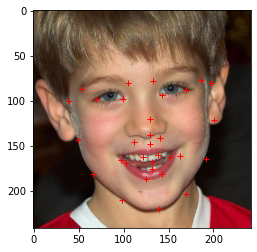

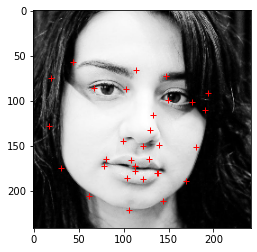

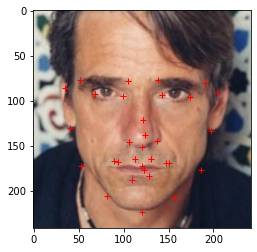

In [8]:
def visualise_pts(img, pts):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.plot(121*pts[0::2]+ 121, 121*pts[1::2]+ 121, '+r')
    #   plt.savefig('1.png')
    plt.show()

for i in range(3):
  idx = np.random.randint(0, 3)
  visualise_pts(testImages1[i],predictedPts[i])

# Calculating Prediction Error and exporting results

In [9]:
## Function to calculate euclidean distance between predicted and real points
def euclid_dist(pred_pts, gt_pts):
  """
  Calculate the euclidean distance between pairs of points
  :param pred_pts: The predicted points
  :param gt_pts: The ground truth points
  :return: An array of shape (no_points,) containing the distance of each predicted point from the ground truth
  """
  import numpy as np
  pred_pts = np.reshape(pred_pts, (-1, 2))
  gt_pts = np.reshape(gt_pts, (-1, 2))
  return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))

In [25]:
# Use model to predict points on training images
predictedPoints = model2.predict(trainImages)

# Copy real points into new variable
basePoints = pts.copy()

# Reshape points to be in suitable format
predictedPoints = predictedPoints * 121
predictedPoints = predictedPoints + 121
basePoints = basePoints * 121
basePoints = basePoints + 121

# Calculate the mean of all distances
np.mean(euclid_dist(predictedPoints,basePoints))

7.3466334


# Visualization of example set prediction results

In [11]:
# Load data from file
example = np.load('examples.npz',allow_pickle=True)

# Extract images from data
exampleImages1 = example['images']

# Change images to grayscale
exampleImages = rgb2gray(exampleImages1)

# Reshape image for use in model
exampleImages = exampleImages.reshape(-1,242,242,1)

# Use model to predict points on example images
predictedPts2 = model2.predict(exampleImages)

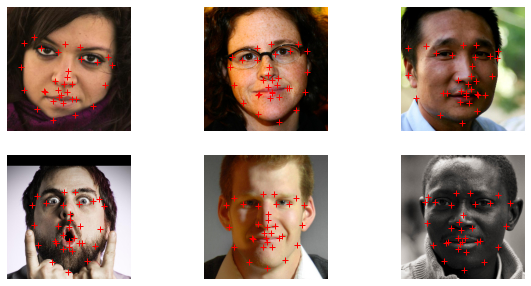

In [22]:
# Visualization of example set prediction results
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5)) #Set size


plt.subplot(2,3,1), plt.plot(121*predictedPts2[0][0::2]+ 121, 121*predictedPts2[0][1::2]+ 121, '+r')
plt.imshow(exampleImages1[0]), plt.axis('off')
plt.subplot(2,3,2), plt.plot(121*predictedPts2[1][0::2]+ 121, 121*predictedPts2[1][1::2]+ 121, '+r')
plt.imshow(exampleImages1[1]), plt.axis('off')

plt.subplot(2,3,3), plt.plot(121*predictedPts2[2][0::2]+ 121, 121*predictedPts2[2][1::2]+ 121, '+r')
plt.imshow(exampleImages1[2]), plt.axis('off')
plt.subplot(2,3,4), plt.plot(121*predictedPts2[3][0::2]+ 121, 121*predictedPts2[3][1::2]+ 121, '+r')
plt.imshow(exampleImages1[3]), plt.axis('off')

plt.subplot(2,3,5), plt.plot(121*predictedPts2[4][0::2]+ 121, 121*predictedPts2[4][1::2]+ 121, '+r')
plt.imshow(exampleImages1[4]), plt.axis('off')
plt.subplot(2,3,6), plt.plot(121*predictedPts2[5][0::2]+ 121, 121*predictedPts2[5][1::2]+ 121, '+r')
plt.imshow(exampleImages1[5]), plt.axis('off')

# plt.savefig("example.png")
plt.show()


In [1]:
# Save test set prediction results
def save_as_csv(points, location = '.'):
    """
    Save the points out as a .csv file
    :param points: numpy array of shape (no_test_images, no_points, 2) to be saved
    :param location: Directory to save results.csv in. Default to current working directory
    """
    assert points.shape[0]==554, 'wrong number of image points, should be 554 test images'
    assert np.prod(points.shape[1:])==32*2, 'wrong number of points provided. There should be 32 points with 2 values (x,y) per point'
    np.savetxt(location + '/results1_m_0.01.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')


In [12]:
for i in range(554):
    for j in range(64):
        predictedPts[i][j]=121*predictedPts[i][j]+121
# save_as_csv(predictedPts)